## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [59]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

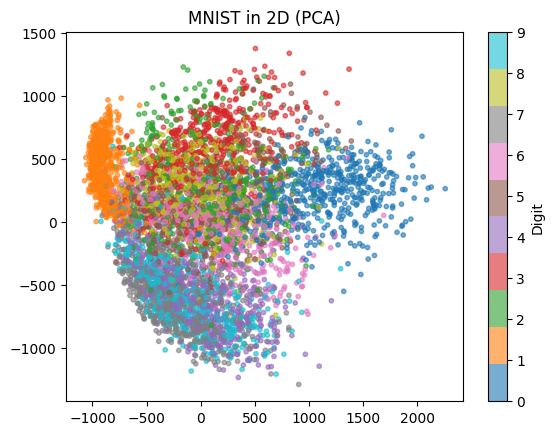

In [60]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_mnist_train)

plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_mnist_train, cmap="tab10", s=10, alpha=0.6)
plt.colorbar(label="Digit")
plt.title("MNIST in 2D (PCA)")
plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

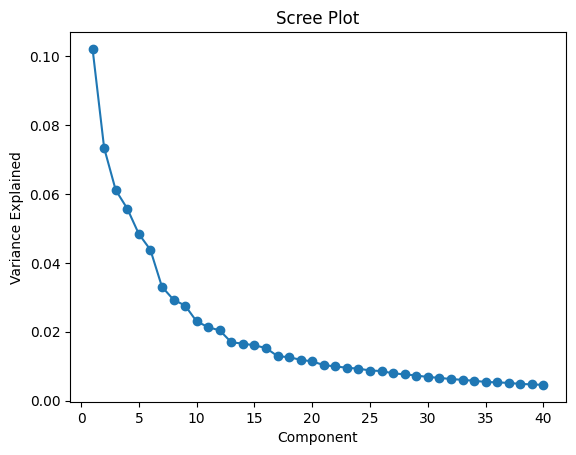

In [61]:
pca_full = PCA().fit(X_mnist_train)
plt.plot(np.arange(1, 41), pca_full.explained_variance_ratio_[:40], marker="o")
plt.xlabel("Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [62]:
cumulative = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative >= 0.95) + 1
print("Components needed for 95% variance:", n_components_95)

Components needed for 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

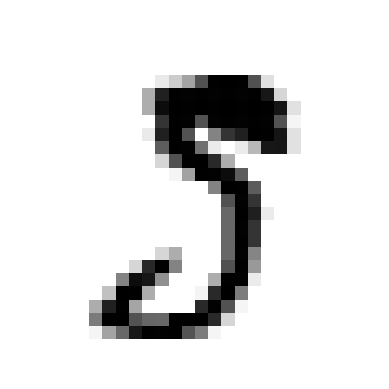

In [63]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

PCA (95% variance):


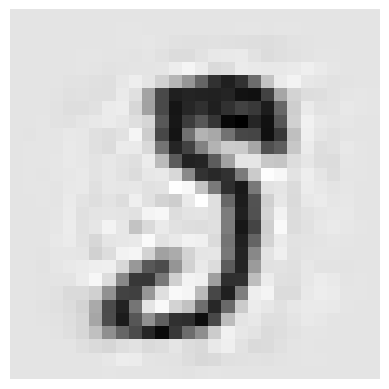

In [64]:
# Step 5: Reconstruct a digit using PCA with n_components_95
pca_reduced = PCA(n_components=n_components_95)
X_train_reduced = pca_reduced.fit_transform(X_mnist_train)

print("PCA (95% variance):")
plot_mnist_digit(digit_reconstructed)


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [65]:
from sklearn.neighbors import KNeighborsClassifier

pca_80 = PCA(0.80)
X_train_pca = pca_80.fit_transform(X_mnist_train)
X_test_pca = pca_80.transform(X_mnist_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_mnist_train, y_mnist_train)
y_pred_no_pca = knn.predict(X_mnist_test)
acc_no_pca = accuracy_score(y_mnist_test, y_pred_no_pca)

knn.fit(X_train_pca, y_mnist_train)
y_pred_pca = knn.predict(X_test_pca)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)

print("KNN accuracy without PCA:", acc_no_pca)
print("KNN accuracy with PCA (80% variance):", acc_pca)
print("Number of components for 80% variance:", pca_80.n_components_)

KNN accuracy without PCA: 0.9428571428571428
KNN accuracy with PCA (80% variance): 0.9457142857142857
Number of components for 80% variance: 42


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

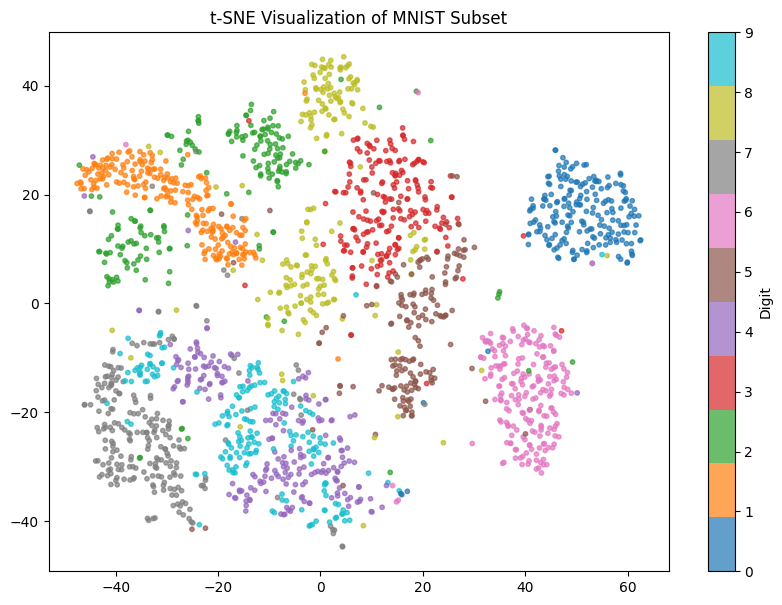

In [66]:
from sklearn.manifold import TSNE

X_subset = X_mnist_train[:2000]
y_subset = y_mnist_train[:2000]

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=y_subset, cmap="tab10", s=10, alpha=0.7)
plt.colorbar(scatter, label="Digit")
plt.title("t-SNE Visualization of MNIST Subset")
plt.show()


2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [67]:
from sklearn.metrics import accuracy_score

knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_tsne, y_subset)
y_pred_tsne = knn_tsne.predict(X_tsne)

acc_tsne = accuracy_score(y_subset, y_pred_tsne)
print("KNN accuracy on t-SNE embedding:", acc_tsne)

KNN accuracy on t-SNE embedding: 0.9465


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [68]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

# %pip install numpy==2.0
# %pip install umap-learn

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


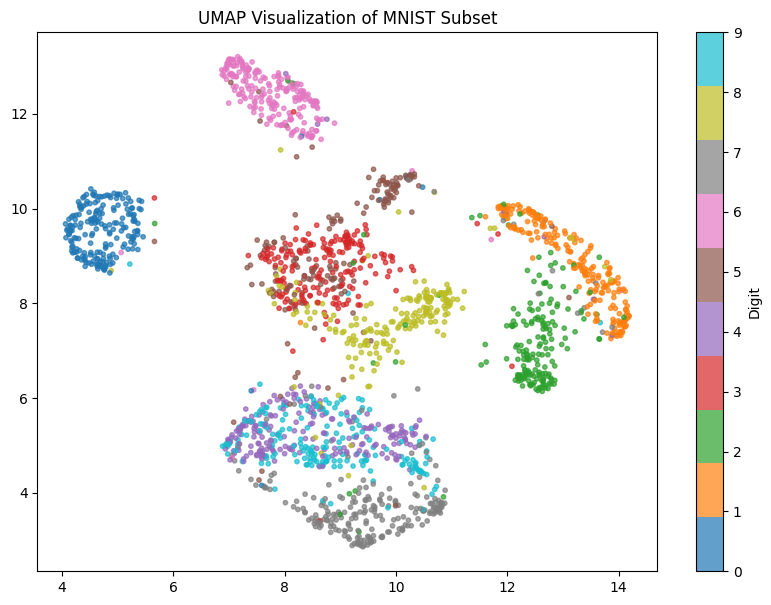

In [69]:
import umap.umap_ as umap

X_subset = X_mnist_train[:2000]
y_subset = y_mnist_train[:2000]

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_subset)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_subset, cmap="tab10", s=10, alpha=0.7)
plt.colorbar(scatter, label="Digit")
plt.title("UMAP Visualization of MNIST Subset")
plt.show()

Now, calculate accuracy with KNN.

In [70]:
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_umap, y_subset)
y_pred_umap = knn_umap.predict(X_umap)

acc_umap = accuracy_score(y_subset, y_pred_umap)
print("KNN accuracy on UMAP embedding:", acc_umap)

KNN accuracy on UMAP embedding: 0.871


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


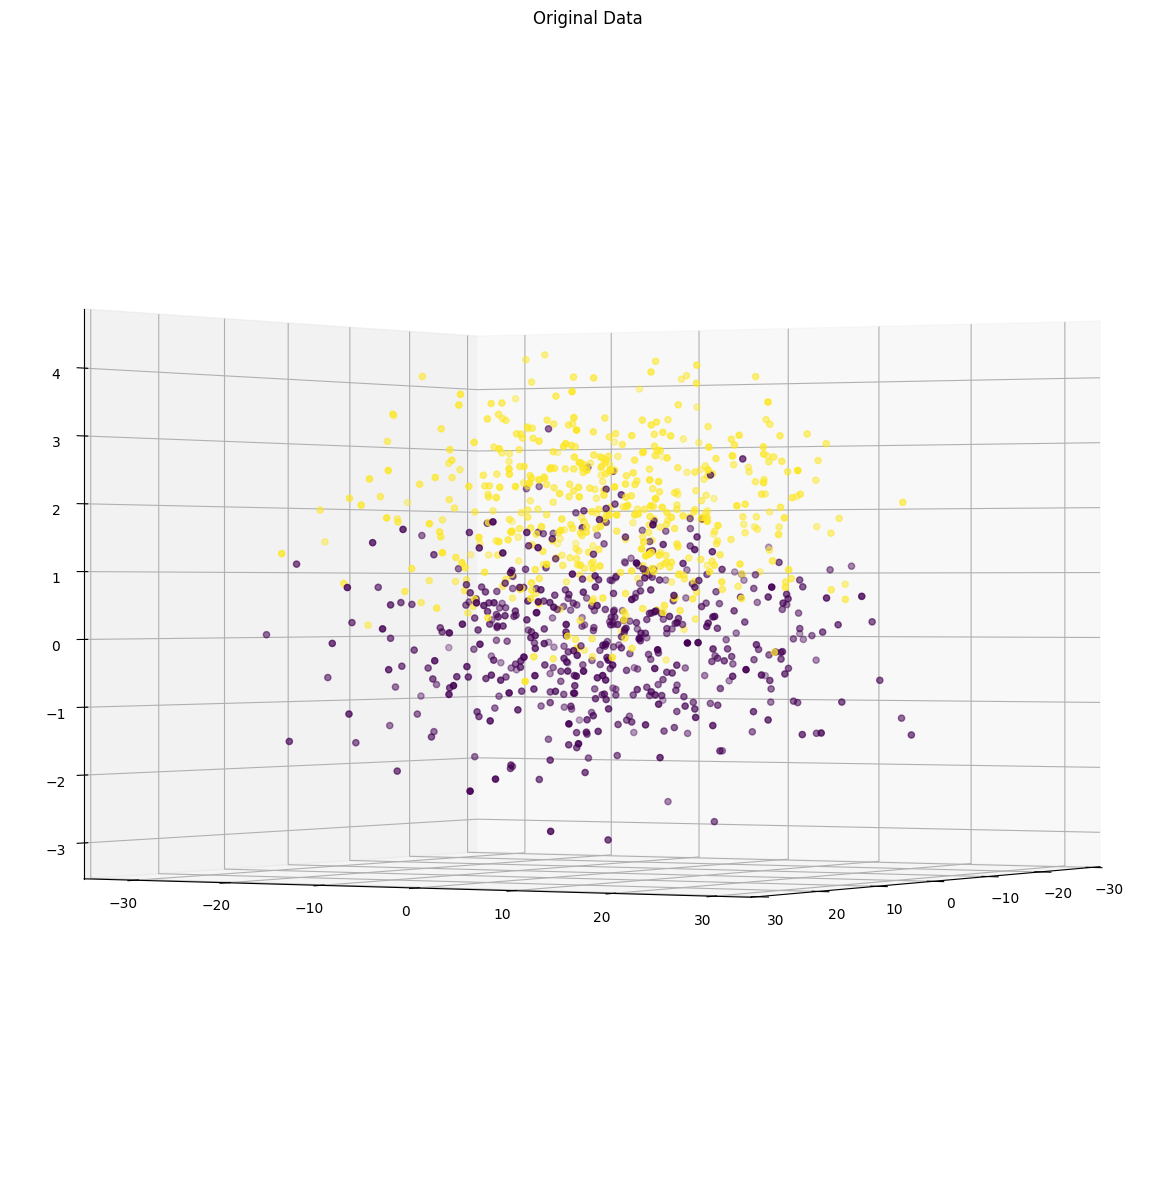

In [71]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [72]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

PCA (dims=2) → KNN accuracy: 0.7650


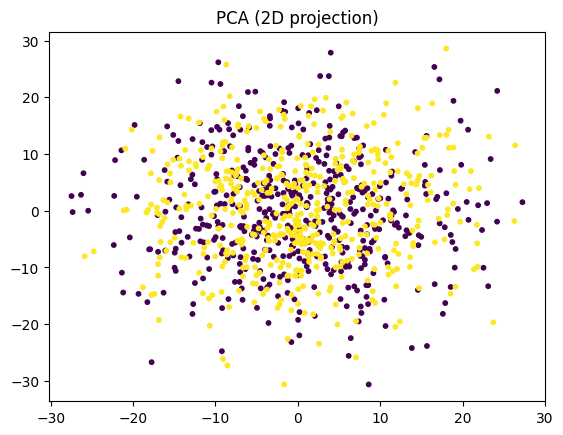

PCA (dims=3) → KNN accuracy: 0.8780


In [73]:
dims = [2, 3]
pca_results = {}

for d in dims:
    pca_model = PCA(n_components=d)
    X_pca = pca_model.fit_transform(X)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_pca, y)
    y_pred = knn.predict(X_pca)
    acc = accuracy_score(y, y_pred)
    pca_results[d] = acc
    print(f"PCA (dims={d}) → KNN accuracy: {acc:.4f}")

    if d == 2:
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=10)
        plt.title("PCA (2D projection)")
        plt.show()   

In [74]:
# Your code here


2. Try with UMAP.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (dims=2, n_neighbors=5) → KNN accuracy: 0.8230


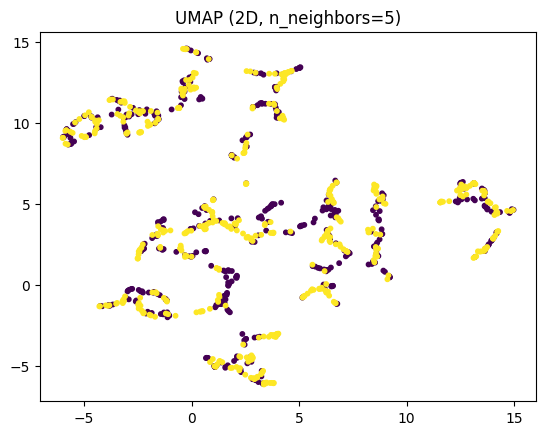

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (dims=2, n_neighbors=15) → KNN accuracy: 0.8010


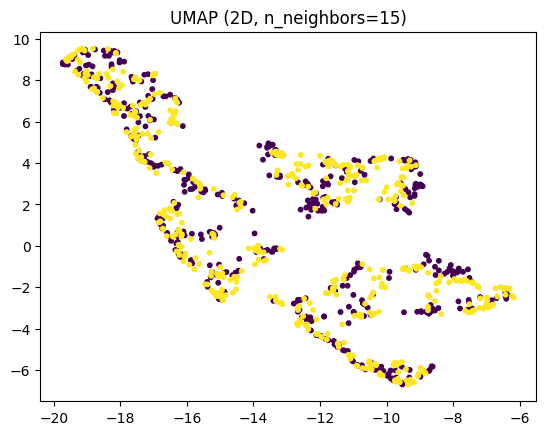

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (dims=2, n_neighbors=50) → KNN accuracy: 0.7720


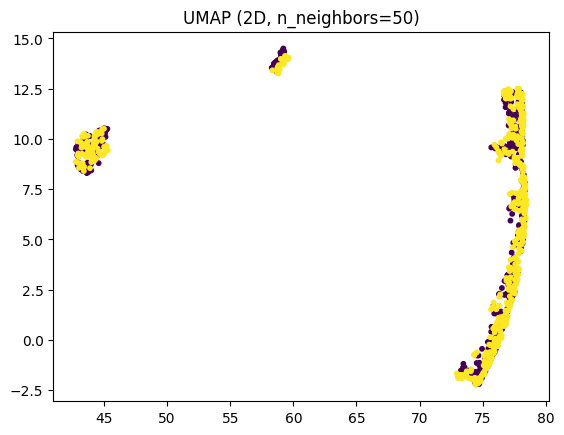

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (dims=3, n_neighbors=5) → KNN accuracy: 0.8180


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (dims=3, n_neighbors=15) → KNN accuracy: 0.8080


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (dims=3, n_neighbors=50) → KNN accuracy: 0.7990


In [75]:
import umap.umap_ as umap

dims = [2, 3]
neighbors = [5, 15, 50]
umap_results = {}

for d in dims:
    for n in neighbors:
        umap_model = umap.UMAP(n_components=d, n_neighbors=n, min_dist=0.1, random_state=42)
        X_umap = umap_model.fit_transform(X)

        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_umap, y)
        y_pred = knn.predict(X_umap)
        acc = accuracy_score(y, y_pred)
        umap_results[(d, n)] = acc
        print(f"UMAP (dims={d}, n_neighbors={n}) → KNN accuracy: {acc:.4f}")

        if d == 2:
            plt.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap="viridis", s=10)
            plt.title(f"UMAP (2D, n_neighbors={n})")
            plt.show()

In [76]:
# Your code here


Explain your results in the cell below.  Which works better?  Why?

PCA:
Because it is capturing the global variance and is not preserving the class boundaries, its accuracy is the lowest (~77%).

UMAP:
With small n_neighbors=5, it is keeping very tight local neighborhoods, which is perfect for KNN (best result: 82.3%).
As neighbors are increasing (15 → 50), UMAP is blending clusters more globally, lowering the accuracy.

2D vs 3D:
2D captures enough separation and 3D gives no gain and can even slightly reduce accuracy.